In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
%matplotlib inline

In [2]:
DATA_RAW_IN='/home/kvassay/data/z/data/reviews_raw.txt'
ENCODING='iso-8859-1'
DATASET_OUT='/home/kvassay/data/z/data/reviews_train_test_dev1.pickle'

In [3]:
def parse_line(line):
    splitted_line=line.split(':')
    return {splitted_line[0]:':'.join(splitted_line[1:]).strip()}

def read_dataset(path):
    records=[]
    with open(path, 'rb') as f:
        current_record={}
        first=True
        iteration=0
        for x in f.readlines():
            line=x.decode(ENCODING)
            if line.startswith('product/'):
                if not first:
                    records.append(current_record)
                first=False
                current_record=parse_line(line)
                current_record['review_id']=iteration
                iteration+=1
                continue
            if line.startswith('review/'):
                current_record.update(parse_line(line))
    return pd.DataFrame(records)

def normalize_data(df):
    df['score']=df['review/score'].astype(float)
    df['summary']=df['review/summary']
    df['text']=df['review/text']
    df['text']=df['text'].str.replace('<br />','\n\n')
    df.drop(df.columns.difference(['review_id','score','summary','text']), 1, inplace=True)
    return df
    
    
def train_dev_test_split(df,dev_train_size=0.2):
    train, x =train_test_split(df, test_size=dev_train_size,shuffle=True)
    dev, test = train_test_split(x, test_size=0.5,shuffle=True)
    return train,dev,test

In [4]:
df=read_dataset(DATA_RAW_IN)
df=normalize_data(df)
train,dev,test=train_dev_test_split(df,dev_train_size=0.03)

In [11]:
train.head(2)

,review_id,score,summary,text
185662,185662,3.0,Not enough maple flavor,"It was a good Maple syrup, but not enough mapl..."
293662,293662,1.0,MAYBE a step above Stouffers,"Some of the beef tips were so gristly, I had t..."


#### Train label balance

5.0    352226
4.0     78240
1.0     50743
3.0     41336
2.0     28854
Name: score, dtype: int64


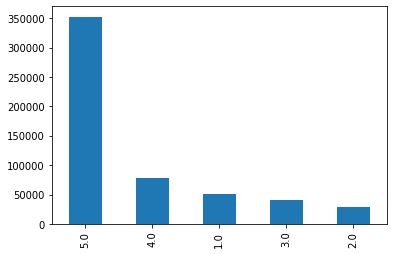

In [5]:
print(train['score'].value_counts())
train['score'].value_counts().plot.bar()

#### Dev label balance

5.0    5446
4.0    1190
1.0     776
3.0     659
2.0     456
Name: score, dtype: int64


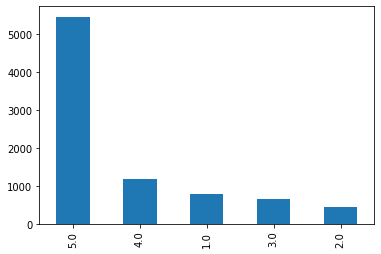

In [6]:
print(dev['score'].value_counts())
dev['score'].value_counts().plot.bar()

#### Test label balance

5.0    5449
4.0    1225
1.0     749
3.0     645
2.0     459
Name: score, dtype: int64


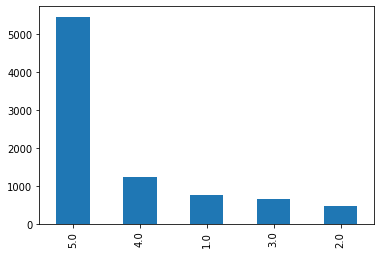

In [7]:
print(test['score'].value_counts())
test['score'].value_counts().plot.bar()

## Persist

In [8]:
with open(DATASET_OUT,'wb') as f:
    pickle.dump((train.to_dict(orient='records'), dev.to_dict(orient='records'), test.to_dict(orient='records')), f)